In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [2]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

### Conjunto de dados pequeno e com ruído

Polinômio de segunda ordem em uma variável:

$$y = 2 + x_1 + 0.5x_{1}^{2}$$

In [3]:
# Sets the number of examples.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function.
# Second order polynomial.
y = 2 + x1 + 0.5*x1**2

# Noise.
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

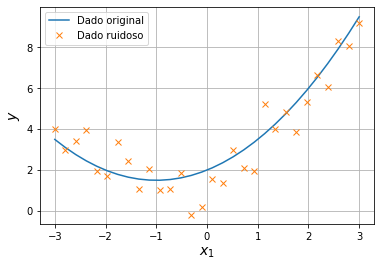

In [4]:
plt.plot(x1, y, label='Dado original')
plt.plot(x1, y_noisy, 'x', label='Dado ruidoso')
plt.legend(loc='best')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
# Save figure
#plt.savefig("poly-reg-data.png", dpi=600)
#Show the plot.
plt.show()

### Treinando modelos de regressão polinomial de diferentes ordens.

+ A classe `PolynomialFeatures` cria a matriz de atributos com as combinações polinomiais dos atributos.
+ A classe `Pipeline` cria um objeto que sequencializa a aplicação de transformadores e estimadores (e.g., PolynomialFeatures e StandardScaler, LinearRegression) aos dados e, ao final, treina e realiza predições.

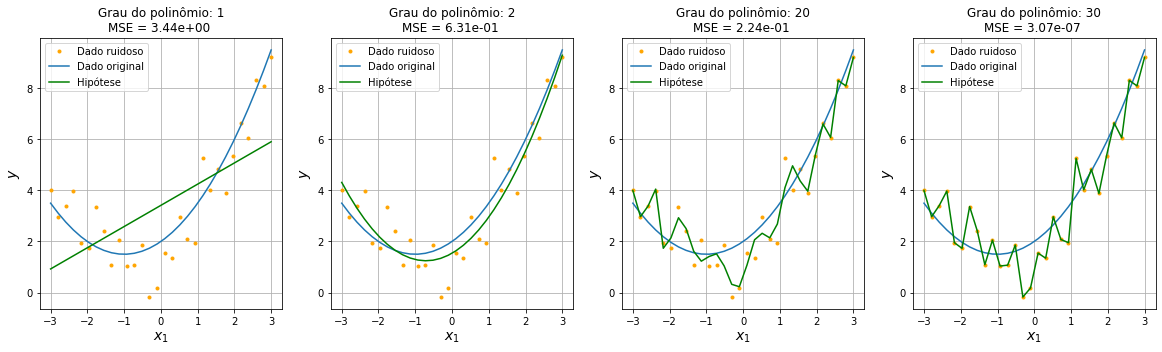

In [5]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20, 30]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1) 

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)
    
    plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
    plt.plot(x1, y, label='Dado original')
    plt.plot(x1, yp1, 'g', label='Hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e} ".format(degrees[i], mse))

# Show the plot.
plt.show()

+ Como podemos percerber, o polinômio de ordem 1 **não é flexível o suficiente** para se "contorcer" e aproximar a função verdadeira.
    + Capacidade de generalização e flexibilidade **muito baixas**.
    + Fenômeno conhecido como **subajuste** (do inglês, *underfitting*).

+ O menor erro quadrático médio (MSE) é obtido com o polinômio de ordem 30, pois devido à sua alta "complexidade/flexibilidade" ele se "ajusta" quase que perfeitamente aos dados de treinamento, "aprendendo" até o ruído presente.

+ É como se o modelo **memorizasse** os dados de treinamento.
    + Este efeito ocorre com modelos de ordem próxima à quantidade de exemplos.
    + Porém, a aproximação se distancia bastante do modelo gerador.
    + Capacidade de generalização **muito baixa** e flexibilidade **muito alta**.
    + Fenômeno conhecido como **sobreajuste** (do inglês, *overfitting*).

+ Já o polinômio de segunda ordem é o que melhor se ajusta à função verdadeira.
    + **Compromisso** entre capacidade de generalização e flexibilidade.
    + Essa aproximação será melhor quanto maior for o conjunto e/ou menor a quantidade de ruído.
    
+ A **flexibilidade** pode ser medida com as amostras usadas para o treinamento do modelo. Esse erro é chamdo de **erro de treinamento**.

+ A **capacidade de generalização** pode ser medida com amostras inéditas, ou seja, não vistas durante o treinamento. Esse erro é chamado de **erro de validação**.

+ Portanto, é muito comum dividirmos o **conjunto total de amostras** em dois conjuntos, **treinamento** e **validação**.

+ Qual dos quatro modelos seria o melhor na tarefa de predizer valores de saída para entradas não vistas durante o treinamento?
    + Essa capacidade de predizer valores para entradas não vistas anteriormente é chamada de **capacidade de generalização**.

### Conjunto de dados pequeno, porém, sem ruído

In [6]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

In [7]:
# Sets the number of examples.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function
y = 2 + x1 + 0.5*x1**2

# Observable function.
y_noisy = y

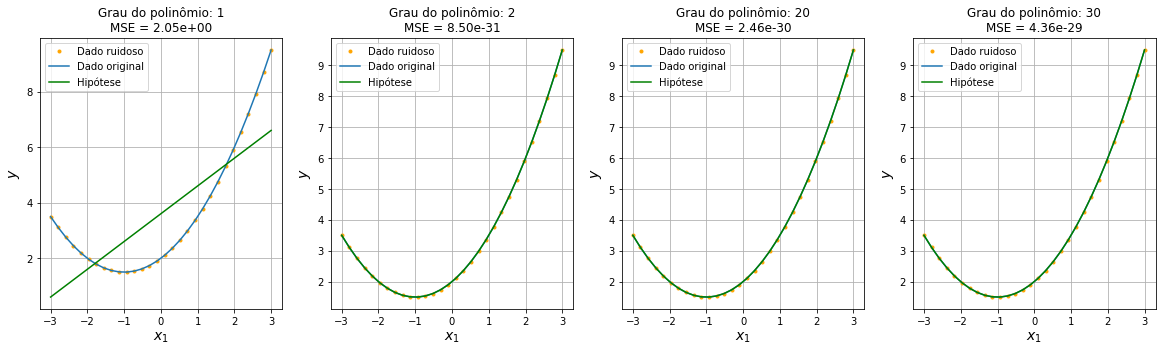

In [8]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20, 30]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)  

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)    
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)
    
    plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
    plt.plot(x1, y, label='Dado original')
    plt.plot(x1, yp1, 'g', label='Hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))

#Show the plot.
plt.show()

+ Como não existe ruído sendo adicionado aos exemplos do polinômio gerador, qualquer polinômio com ordem maior ou igual à ordem do polinômio (neste caso, dois) já consegue aproximar perfeitamente os dados de treinamento.

+ Qualquer ordem de polinômio maior ou igual a dois já tem flexibilidade o suficiente para se ajustar à função original.

+ Portanto, **quanto menos ruído** as amostras tiverem, mesmo com um polinômio muito flexível, **melhor serão as aproximações**.

### Conjunto de treinamento maior e com ruído

In [9]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

In [10]:
# Sets the number of examples.
N = 1000

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function.
y = 2 + x1 + 0.5*x1**2

# Noise.
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

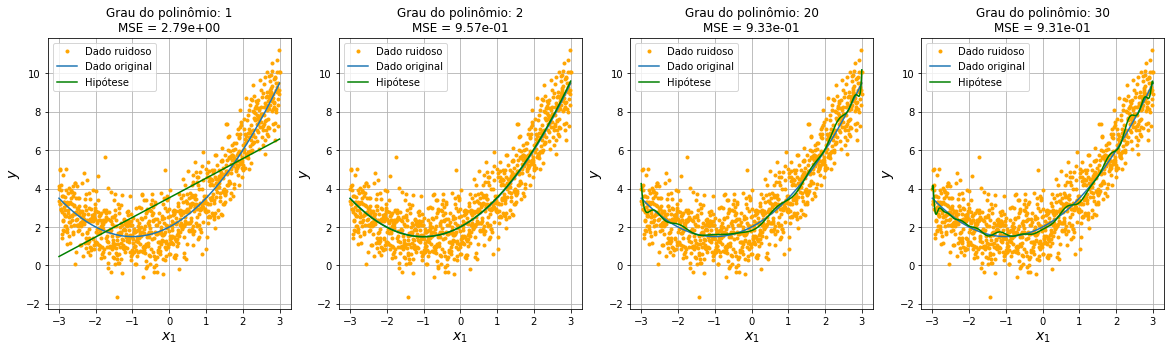

In [11]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20, 30]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)  

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)    
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)
    
    plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
    plt.plot(x1, y, label='Dado original')
    plt.plot(x1, yp1, 'g', label='Hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))

#Show the plot.
plt.show()

+ A aproximação será melhor quanto maior for o conjunto de treinamento. 

+ Para ordem igual a 2, vemos que o aumento do conjunto de treinamento resultou em um modelo melhor.

+ Mesmo com uma base maior, o polinômio de ordem 1 (i.e., reta) não tem flexibilidade o suficiente para aproximar a função verdadeira.

+ Polinômios de ordem vinte e trinta se aproximam mais da função verdadeira.
    + Como temos um número de amostras muito maior do que o grau do polinômio, ele não tem flexibilidade/complexidade o suficiente para **memorizar** as amostras.

### Conjunto de treinamento maior ainda com ruído

In [12]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

In [13]:
# Sets the number of examples.
N = 100000

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function.
y = 2 + x1 + 0.5*x1**2

# Noise.
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

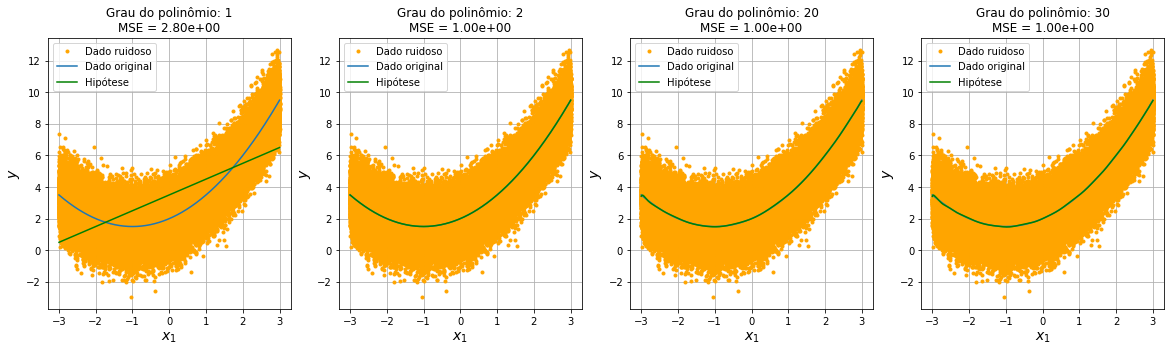

In [14]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20, 30]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)  

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)    
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)

    plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
    plt.plot(x1, y, label='Dado original')
    plt.plot(x1, yp1, 'g', label='Hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))

#Show the plot.
plt.show()

+ O regressor linear encontra os **pesos** que fazem com que a **função hipótese** polinomial escolhida **minimize** o **erro** para todos os valores de $x_1$.

+ Olhando a grande quantidade de pontos laranja, percebemos que a **única forma de minimizar o erro** para todo valor de $x_1$, é ter a **função hipótese passando exatamente pela média dos valores de $y$**, o que resulta em uma ótima aproximação da função geradora.


+ Vejam que como a ordem dos dois últimos polinômios é muito menor do que a quantidade de amostras, a função hipótese polinomial escolhida não se ajusta aos pontos ruidosos, como antes, mas sim à média dos valores de $y$ ao longo dos valores de $x_1$.


+ Como utilizamos muitos exemplos de treinamento, a capacidade (ou flexibilidade) do modelo não é suficiente para passar por todos os pontos (i.e., **memorizar**), ele então deixa de aprender o ruído para se concentrar em aprender a função por trás do processo de geração dos dados, ou seja, ela encontra uma função que minimiza o erro quadrático médio.


+ A figura abaixo deixa isso mais claro.

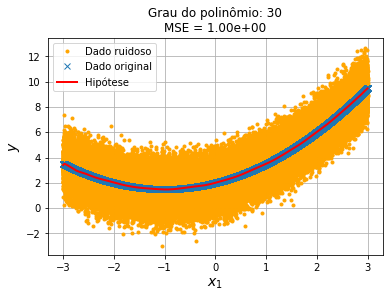

In [15]:
plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
plt.plot(x1, y, 'x', label='Dado original')
plt.plot(x1, yp1, 'r', linewidth=2, label='Hipótese')
plt.legend(loc='best')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))
plt.show()